In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

### pie chart : 카테고리별 값이 상대적인 비교

In [12]:
labels = ['뽕사부', '순대국밥', '개구리비빔밥', '생고기', '지하철버거']
datas = [15, 15, 20, 25, 25]
colors = ['gold', 'blue', 'red', 'yellow', 'green']

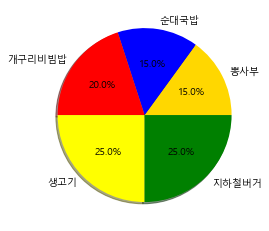

In [14]:
plt.figure()
plt.pie(datas, labels = labels, colors = colors, shadow=True, autopct='%1.1f%%')

plt.show()
plt.close()

In [16]:
pieDF = pd.read_csv('./data/auto-mpg.csv', header=None)
pieDF.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

In [19]:
pieDF['cnt'] = 1 # dummy feature

In [20]:
pieDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [45]:
originDF = pieDF.groupby('origin').sum() # 제조국을 기준으로 sum
originDF.index = ['USA', 'EU', 'KOREA'] # 1,2,3 인덱스를 변경하기

In [49]:
cylindersDF = pieDF.groupby('cylinders').sum()
cylindersDF.index

Int64Index([3, 4, 5, 6, 8], dtype='int64', name='cylinders')

In [27]:
originDF

,mpg,cylinders,displacement,weight,acceleration,model year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
KOREA,2405.6,324,8114.0,175477.0,1277.6,6118,79


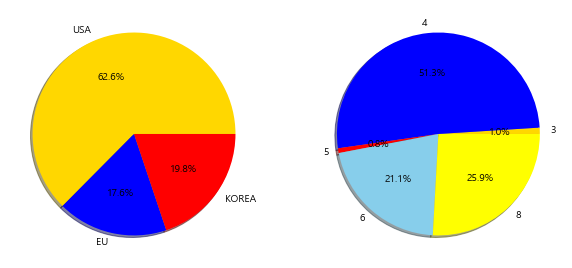

In [52]:
fig = plt.figure(figsize=(10, 10))

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

 # originDF['cnt'].plot(kind='pie' , autopct='%1.1f%%', colors = ['gold', 'blue', 'red'], startangle=100, shadow = True)
ax01.pie(originDF['cnt'].values, labels = originDF.index, colors = colors, shadow=True, autopct='%1.1f%%')
ax02.pie(cylindersDF['cnt'].values, labels = cylindersDF.index, colors = ['gold', 'blue', 'red', 'skyblue', 'yellow'], shadow=True, autopct='%1.1f%%')


# plt.title('model origin')
# plt.legend(labels = originDF.index , loc='upper left')

# plt.axis('equal')

plt.show()
plt.close()

<AxesSubplot:ylabel='cylinders'>

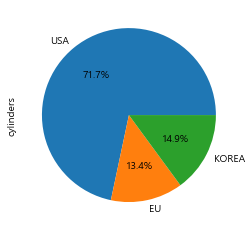

In [44]:
originDF['cylinders'].plot(kind='pie', autopct='%1.1f%%')
